In [2]:
!pip install pandas scikit-learn xgboost matplotlib seaborn

  Using cached pandas-2.3.0-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.7.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pillo


 Entrenando RandomForest...

 Resultados para RandomForest:
 Accuracy en entrenamiento: 1.00
 Accuracy en prueba:       0.99

Classification Report:
                precision    recall  f1-score   support

caminarEspalda       1.00      0.98      0.99       102
 caminarFrente       0.99      0.99      0.99       105
         girar       0.98      0.99      0.99       145
    levantarse       0.98      0.98      0.98       130
      sentarse       0.98      0.99      0.98       166

      accuracy                           0.99       648
     macro avg       0.99      0.99      0.99       648
  weighted avg       0.99      0.99      0.99       648



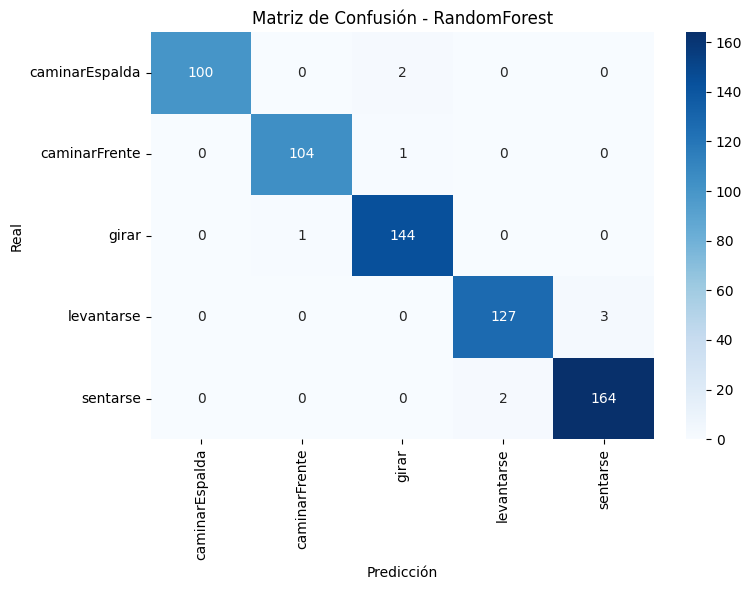


 Entrenando SVM...

 Resultados para SVM:
 Accuracy en entrenamiento: 0.90
 Accuracy en prueba:       0.88

Classification Report:
                precision    recall  f1-score   support

caminarEspalda       1.00      0.98      0.99       102
 caminarFrente       0.93      0.95      0.94       105
         girar       0.98      0.99      0.98       145
    levantarse       0.73      0.77      0.75       130
      sentarse       0.83      0.78      0.80       166

      accuracy                           0.88       648
     macro avg       0.89      0.89      0.89       648
  weighted avg       0.89      0.88      0.88       648



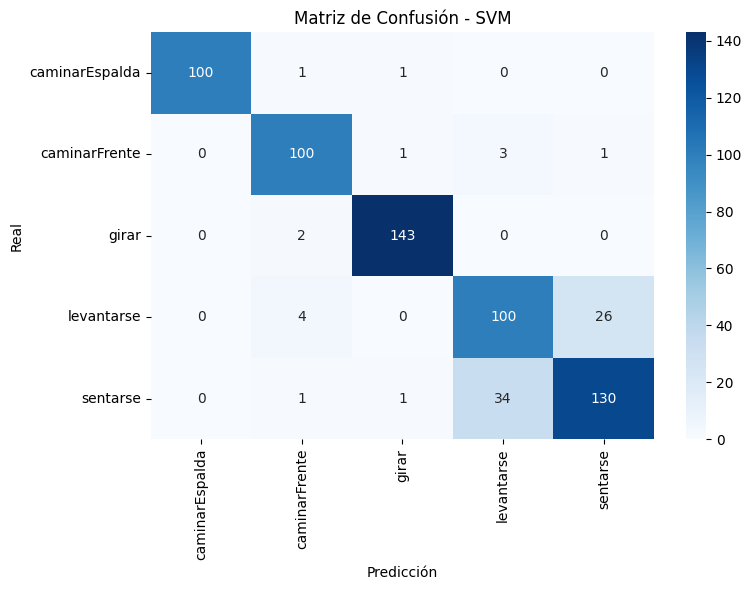


 Entrenando XGBoost...


c:\Users\daron\OneDrive\Escritorio\Semestre VII\IA\Body_Recognition\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [23:15:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Resultados para XGBoost:
 Accuracy en entrenamiento: 1.00
 Accuracy en prueba:       0.99

Classification Report:
                precision    recall  f1-score   support

caminarEspalda       0.99      0.99      0.99       102
 caminarFrente       0.97      0.99      0.98       105
         girar       0.99      0.99      0.99       145
    levantarse       0.99      0.98      0.99       130
      sentarse       0.99      0.98      0.98       166

      accuracy                           0.99       648
     macro avg       0.99      0.99      0.99       648
  weighted avg       0.99      0.99      0.99       648



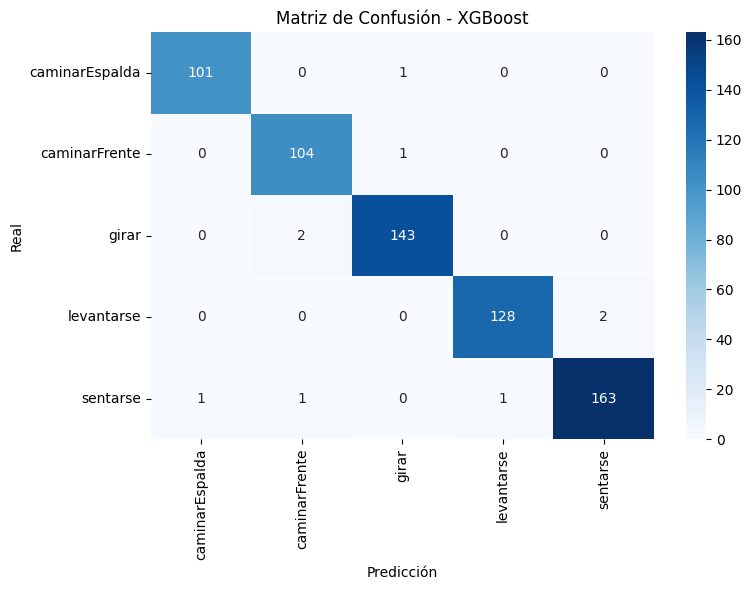

['pca.pkl']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import joblib

# Cargar el dataset
df = pd.read_csv("../data_set_videos/dataset_final.csv")

# Eliminamos las filas con demasiados ceros
umbral_ceros = 0.3
porcentaje_ceros = (df == 0).sum(axis=1) / df.shape[1]
df = df[porcentaje_ceros < umbral_ceros]

# Separar features y etiquetas
X = df.drop(columns=["label", "frame"])
y = df["label"]

# Codificar etiquetas
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Escalar features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.95, svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

# Modelos a evaluar
modelos = {
    "RandomForest": RandomForestClassifier(n_estimators=60, random_state=24),
    "SVM": SVC(kernel='rbf', probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Dividir en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Entrenamiento y evaluación
for nombre, modelo in modelos.items():
    print(f"\n Entrenando {nombre}...")
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)

    train_acc = modelo.score(X_train, y_train)
    test_acc = modelo.score(X_test, y_test)

    print(f"\n Resultados para {nombre}:")
    print(f" Accuracy en entrenamiento: {train_acc:.2f}")
    print(f" Accuracy en prueba:       {test_acc:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Matriz de confusión
    plt.figure(figsize=(8,6))
    cm = confusion_matrix(y_test, y_pred, labels=range(len(le.classes_)))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    # Guardar el modelo
    joblib.dump(modelo, f"modelo_{nombre}.pkl")

joblib.dump(le, "label_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")